# Problem Statement:

1. The high rate of employee attrition can have significant implications for organizations, leading to increased recruitment and training costs, reduced productivity, and decreased employee morale.
2. It is crucial for companies to understand the underlying factors contributing to attrition and take proactive measures to address them.
📊 Project Objective:

1. The objective of this project is to perform an Exploratory Data Analysis (EDA) on the IBM HR Analytics Employee Attrition & Performance dataset using Python.
2. The goal is to gain insights into the factors influencing employee attrition and performance within the organization.
3. By examining various features and conducting statistical analysis, we aim to identify patterns, trends, and potential areas for improvement that can help the company better understand and manage employee attrition and performance.

# Table of Contents:

1. Importing Libraries: - Import all the essentials libraries for Data Manipulation,Visualization & Data Analysis.
2. Loading Dataset: - Load the dataset into a suitable data structure using pandas.
3. Data Wrangling: - To clean, transform, and restructure the data in order to make it suitable for analysis and derive meaningful insights.
4. Exploatory Data Analysis: - To gain insights, discover patterns, and understand the characteristics of the data before applying further analysis.
5. Statistical Analysis: - To assess the significance and impact of different features on the target variable, identify the most important variables.
6. Conclusion: - Conclude the project by summarizing the key findings and limitations related to employee attrition.
7. Recommendations: - Provide suggestions based on key-findings to reduce employee attrition in the organization in future.

In [5]:
import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [2]:
df = pd.read_csv(r"C:\Users\edmla\Downloads\Employee.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Data Wrangling

In [4]:
#Computing the Dimension of Dataset.
df.shape

(1470, 35)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
#Generating Basic Information of Attributes.
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Columns: 35 entries, Age to YearsWithCurrManager
dtypes: int64(26), object(9)
memory usage: 402.1+ KB


Inference:
1. There are only 26 Numerical Attributes in the dataset.
2. On the other hand we have 9 Categorical Attributes.

In [7]:
#Showing A Random Sample of Dataset with only Numerical Features.
df.select_dtypes(np.number).sample(5)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,1282,5,3,1,32,3,58,3,5,...,4,80,1,26,3,2,14,13,4,8
351,32,1062,2,3,1,471,3,75,3,1,...,3,80,1,8,4,3,8,0,0,7
653,50,881,2,4,1,905,1,98,3,4,...,4,80,1,31,3,3,31,6,14,7
1075,32,495,10,3,1,1516,3,64,3,3,...,2,80,0,10,5,4,5,2,0,0
1155,39,170,3,2,1,1627,3,76,2,2,...,4,80,1,11,3,3,10,8,0,7


Inference:
1. Some of the numerical features are storing cateegories labelled in numbers.
2. So for better analysis we will replace those labelled numerical values with appropriate categorical values.

In [8]:
# Labelling of Categories in Numerical Features

df["Education"] = df["Education"].replace({1:"Below College",2:"College",3:"Bachelor",4:"Master",5:"Doctor"})

df["JobInvolvement"] = df["JobInvolvement"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

df["JobLevel"] = df["JobLevel"].replace({1:"Entry Level",2:"Junior Level",3:"Mid Level",4:"Senior Level",
                                         5:"Executive Level"})
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

df["JobSatisfaction"] = df["JobSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

df["PerformanceRating"] = df["PerformanceRating"].replace({1:"Low",2:"Good",3:"Excellent",4:"Outstanding"})

df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].replace({1:"Low",2:"Medium",3:"High",4:"Very High"})

df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({1:"Bad",2:"Good",3:"Better",4:"Best"})

In [9]:
# Let us see a ramdom sample of the data with only categorical Features

df.select_dtypes(include='O').sample(5)

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,Over18,OverTime,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
270,No,Travel_Rarely,Research & Development,Bachelor,Medical,Very High,Male,High,Executive Level,Manager,Low,Single,Y,Yes,Excellent,High,Better
873,No,Travel_Rarely,Research & Development,Master,Life Sciences,High,Male,Low,Entry Level,Laboratory Technician,High,Divorced,Y,No,Excellent,High,Better
399,No,Travel_Rarely,Research & Development,College,Life Sciences,Very High,Male,Medium,Entry Level,Laboratory Technician,Low,Married,Y,No,Excellent,High,Better
1455,No,Travel_Rarely,Research & Development,Master,Life Sciences,High,Male,Medium,Entry Level,Research Scientist,High,Single,Y,No,Excellent,Very High,Better
348,No,Travel_Rarely,Research & Development,Doctor,Life Sciences,Low,Female,High,Senior Level,Research Director,Very High,Single,Y,No,Excellent,Medium,Better


In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2


In [11]:
# Check for duplicates in the data

have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [12]:
# There rae no duplicated rows in the dataset

In [13]:
# Let us Compute Missing values and Percentage of missing values

missing_df = df.isnull().sum().to_frame().rename(columns={0: "Total no.of Missing values"})
missing_df["% of Missing Values"] = round((missing_df["Total no.of Missing values"]/len(df))*100,2)
missing_df

,Total no.of Missing values,% of Missing Values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


# Inferences
1. None of the Attributes are having Missing values
2. As there are no missing values our further Analysis on the data is consistent and unbiased

# Descriptive Analysis on Numerical Attributes

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0


##Inferences
1. As minimum age is 18 years and there is no employee below 18years we can drop over 18 Attribute
2. Standard Hours attribute is having a stadard deviation value zero  which conveys that all the values in that attribute are same
3. Employee Number is a unique ID which will not provide any meaningfull Insights
4. So we can drop Over 18, StandardHours, EmployeeCount Attributes from the dataset

In [15]:
df = df.drop(columns=["Over18", "EmployeeNumber","EmployeeCount", "StandardHours"], axis=1)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


#Performing Descriptive Analysis on Categorical Attributes.
Note:
- Count: It shows the number of values that are not missing in each of the column.
- Unique : It shows the number of unique values present in each of the ccolumn.
- Top : It shows which categorical value is present most in each of the column.
- Freq : It shows the frequency of the categorical value apperaing most in each of the columns.

In [16]:
df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
Education,1470,5,Bachelor,572
EducationField,1470,6,Life Sciences,606
EnvironmentSatisfaction,1470,4,High,453
Gender,1470,2,Male,882
JobInvolvement,1470,4,High,868
JobLevel,1470,5,Entry Level,543
JobRole,1470,9,Sales Executive,326


In [17]:
# Check Unique values in Categorical ATtributes

In [18]:
cat_cols = df.select_dtypes(include="O").columns

for column in cat_cols:
    print("Unique Values of", column, set(df[column]))
    print("-"*125)

Unique Values of Attrition {'Yes', 'No'}
-----------------------------------------------------------------------------------------------------------------------------
Unique Values of BusinessTravel {'Non-Travel', 'Travel_Frequently', 'Travel_Rarely'}
-----------------------------------------------------------------------------------------------------------------------------
Unique Values of Department {'Sales', 'Research & Development', 'Human Resources'}
-----------------------------------------------------------------------------------------------------------------------------
Unique Values of Education {'College', 'Doctor', 'Below College', 'Bachelor', 'Master'}
-----------------------------------------------------------------------------------------------------------------------------
Unique Values of EducationField {'Life Sciences', 'Marketing', 'Human Resources', 'Medical', 'Other', 'Technical Degree'}
-----------------------------------------------------------------------------

# Exploratory Data Analysis

1. Visualizing Employee Attrition Rate

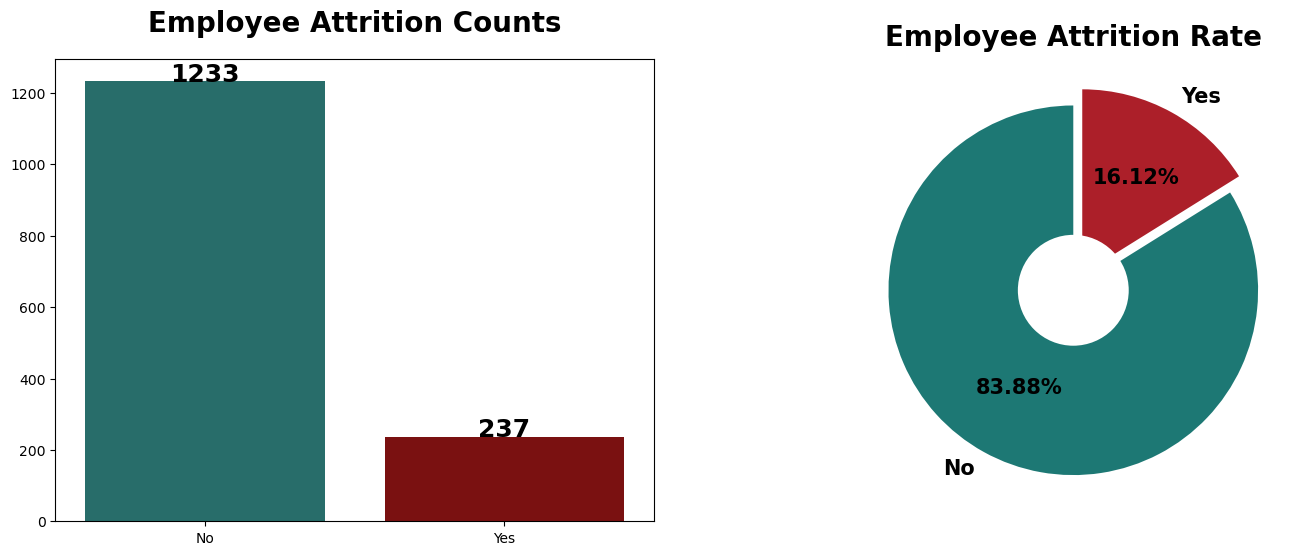

In [19]:
#Visualization to show eployee Attrition in Count

plt.figure(figsize=(17,6))
plt.subplot(1,2,1)

attrition_rate = df["Attrition"].value_counts()
sns.barplot(x = attrition_rate.index, y = attrition_rate.values, palette=['#1d7874', '#8B0000'])
plt.title("Employee Attrition Counts", fontweight="black", size=20, pad=20)
for i, v in enumerate(attrition_rate.values):
    plt.text(i, v, v, ha="center", fontweight="black", fontsize=18)
    
# Visualition to show eployee Attrition in Percentage

plt.subplot(1,2,2)
plt.pie(attrition_rate, labels=["No","Yes"], autopct="%.2f%%", textprops={"fontweight":"black", "size":15},
       colors=['#1d7874', '#AC1F29'], explode=[0,0.1], startangle=90)
center_circle = plt.Circle((0,0), 0.3, fc='white')
fig= plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Employee Attrition Rate", fontweight='black', size=20, pad=10)
plt.show()


2. Analyzing Employee Attrition by Gender

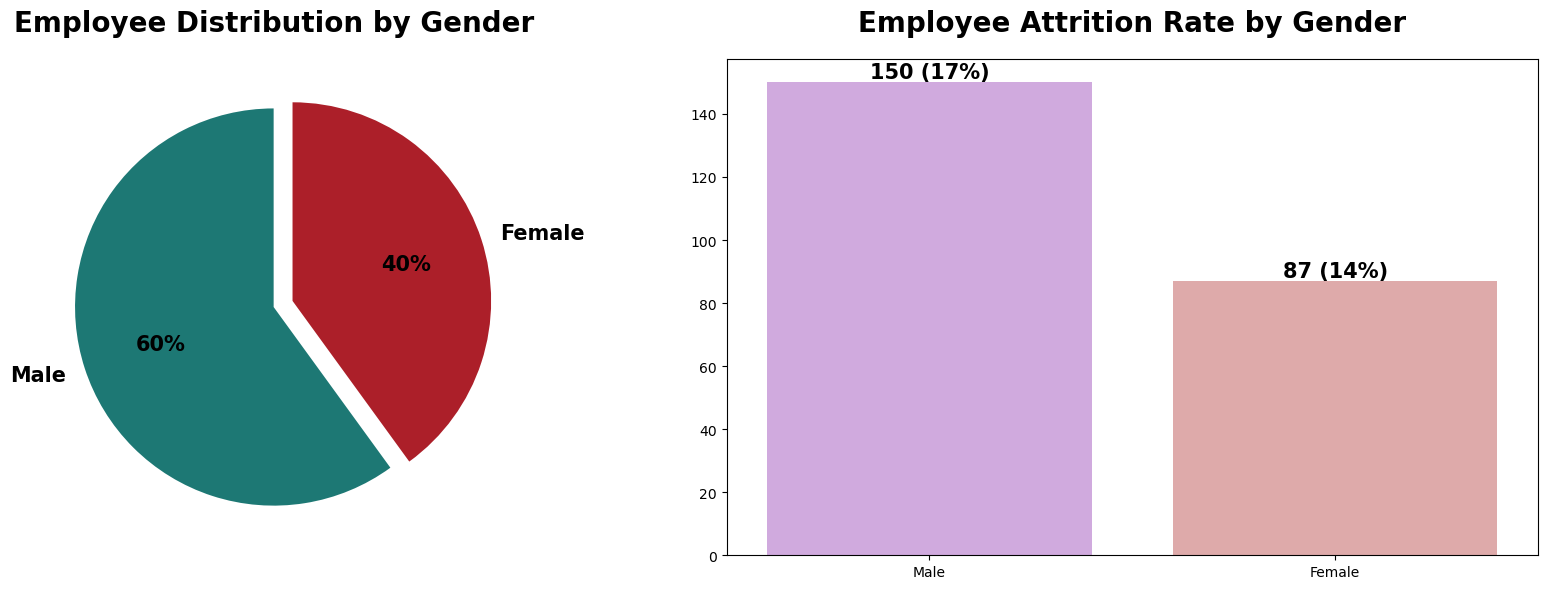

In [20]:
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)

gender_attrition = df["Gender"].value_counts()
plt.title("Employee Distribution by Gender", fontweight="black", size=20, pad=20)
plt.pie(gender_attrition, autopct="%.0f%%", labels=gender_attrition.index, textprops=({"fontweight":"black", "size":15}),
colors=['#1d7874', '#AC1F29'], explode=[0,0.1], startangle=90)

# Visualition to show eployee Attrition by Gender

plt.subplot(1,2,2)

new_df= df[df["Attrition"]=="Yes"]
value_1 = df['Gender'].value_counts()
value_2 = new_df['Gender'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values

sns.barplot(x=value_2.index, y = value_2.values, palette=["#D4A1E7", "#E7A1A1"])
plt.title("Employee Attrition Rate by Gender", fontweight='black', size=20, pad=20)

for index, value in enumerate(value_2):
    plt.text(index,value, str(value)+" ("+str(int(attrition_rate[index]))+"%)", ha="center", va="bottom",
            size=15, fontweight='black')
    
plt.tight_layout()
plt.show()


Inference:
1. The number of male employees in the organization accounts for a higher proportion than female employees by more than 20%.
2. Male employees are leaving more from the organization compared to female employees.

In [21]:
#3. Analyze Employee Attrition by Age

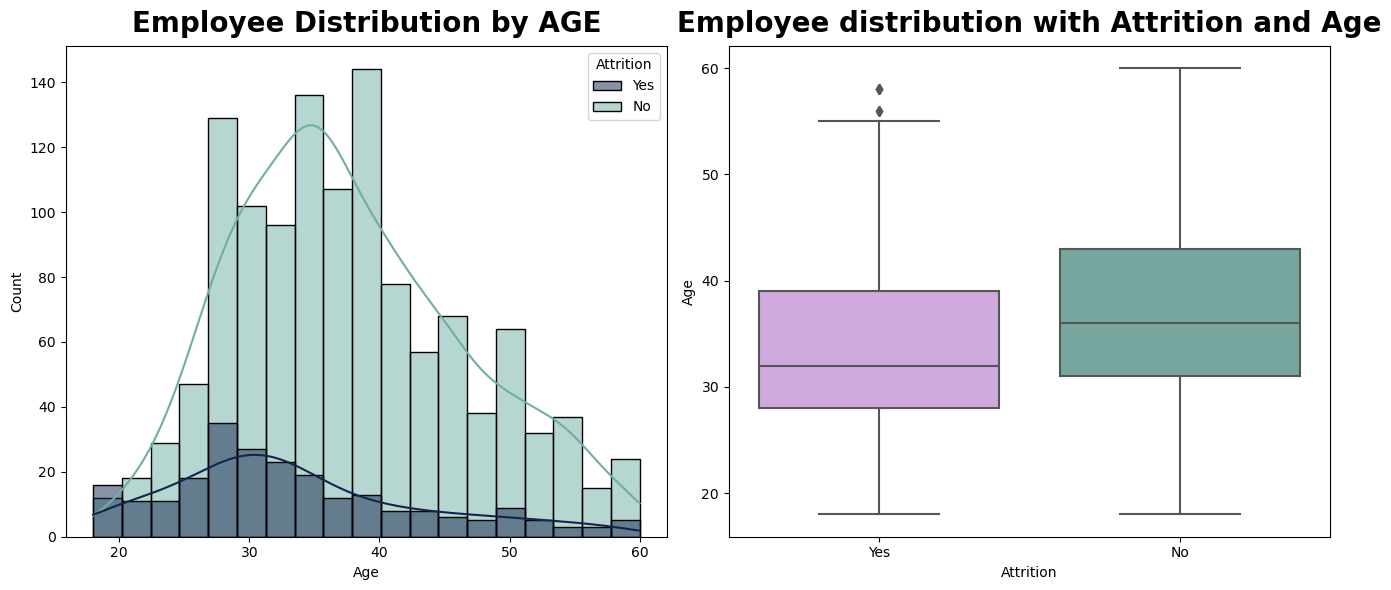

In [22]:
# Visualize to show Employee Distribution by AGE
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
sns.histplot(x="Age", hue="Attrition", data = df, kde=True, palette=["#11264e", "#6faea4"])
plt.title("Employee Distribution by AGE", fontweight="black", size=20, pad=10)


# Visualize Employee Distribution by Attrition and Age

plt.subplot(1,2,2)
sns.boxplot(x="Attrition", y="Age", data = df, palette=["#D4A1E7", "#6faea4"])
plt.title("Employee distribution with Attrition and Age",fontweight="black", size=20, pad=10)
plt.tight_layout()
plt.show()


In [23]:
# Inference


In [24]:
#4. Visualize Attrition with Business Travel

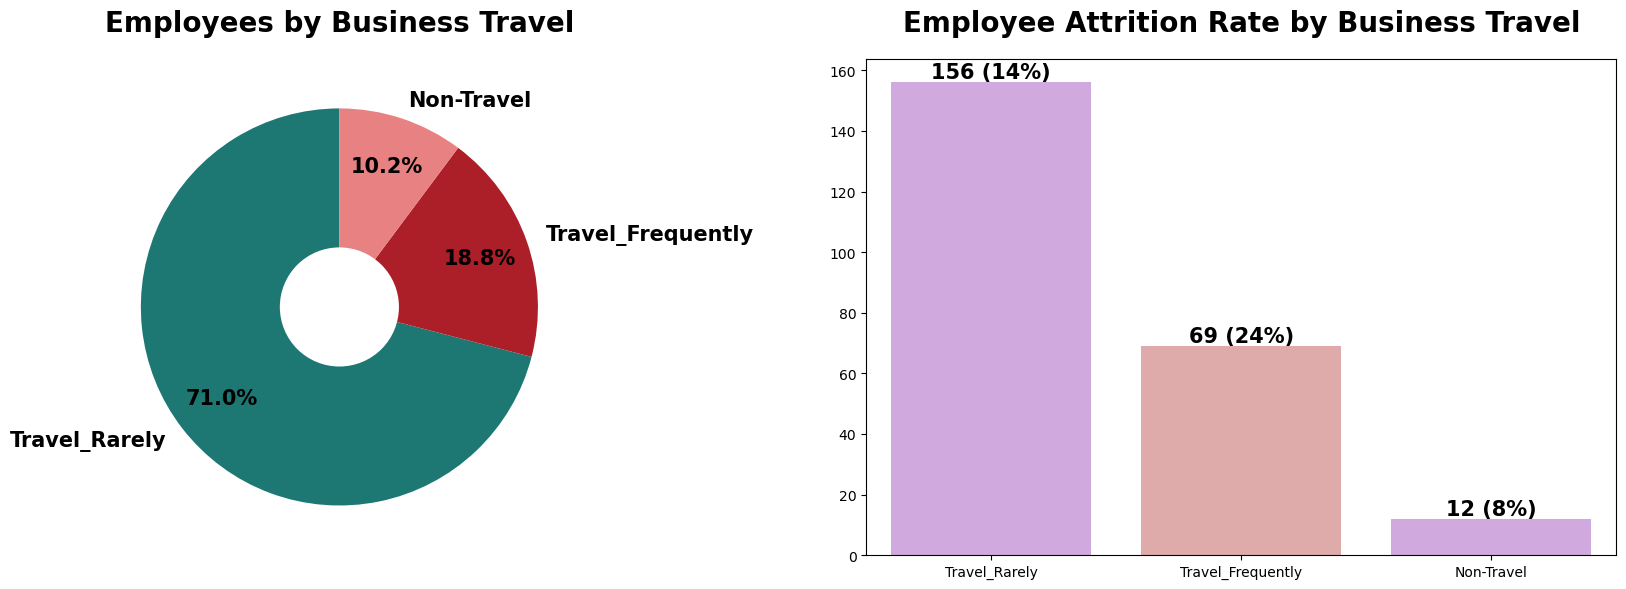

In [25]:
# Visualize Total Employees by Busness Travel
plt.figure(figsize=(17,6))
plt.subplot(1,2,1)

value_1 = df["BusinessTravel"].value_counts()
plt.title("Employees by Business Travel", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, autopct="%.1f%%", labels=value_1.index,pctdistance=0.75,colors=['#1d7874', '#AC1F29', '#E88181'], 
        startangle=90, textprops={"fontweight":"black", "size":15})

center_circle = plt.Circle((0,0), 0.3, fc='white')
fig= plt.gcf()
fig.gca().add_artist(center_circle)

# Visualition to show eployee Attrition by Gender

plt.subplot(1,2,2)

new_df= df[df["Attrition"]=="Yes"]
value_2 = new_df['BusinessTravel'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values

sns.barplot(x=value_2.index, y = value_2.values, palette=["#D4A1E7", "#E7A1A1"])
plt.title("Employee Attrition Rate by Business Travel", fontweight='black', size=20, pad=20)

for index, value in enumerate(value_2):
    plt.text(index,value, str(value)+" ("+str(int(attrition_rate[index]))+"%)", ha="center", va="bottom",
            size=15, fontweight='black')
    
plt.tight_layout()
plt.show()

In [26]:
# Analyze Attrition by Daily Rate

In [27]:
df["DailyRate"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DailyRate,1470.0,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0


In [28]:
# Define the bin edges for the groups

bin_edges = [0, 500, 1000, 1500]

bin_labels = ['Low DailyRate', 'Average DailyRate', 'High DailyRate']

# Cut the DailyRate Coulmn in to Groups

df['DailyRateGroup'] = pd.cut(df['DailyRate'], bins=bin_edges, labels=bin_labels)

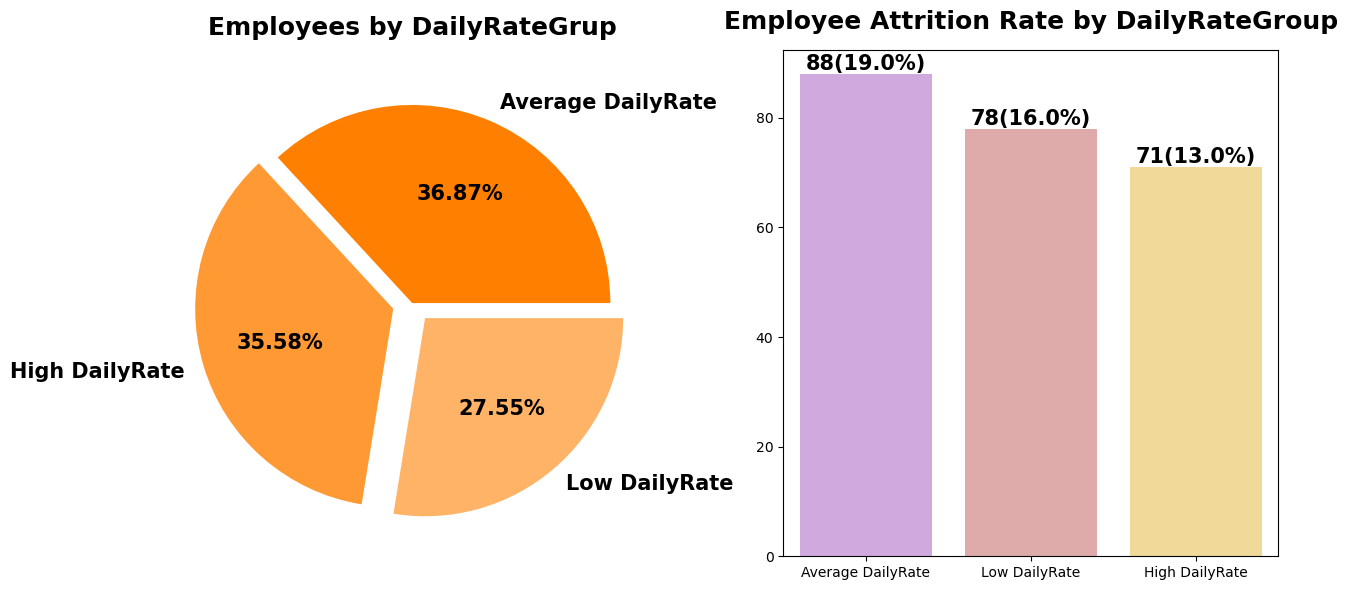

In [29]:
#Visualize to show Total Employees by Daily Rate Group

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)

value_1 = df["DailyRateGroup"].value_counts()

# Plot a pie chart to visualize the Count
plt.pie(value_1.values, labels = value_1.index, autopct="%.2f%%", textprops={"fontweight":'black', "size":15},
       explode=[0,0.1,0.1], colors=['#FF8000', '#FF9933', "#FFB366", '#FFCC99'])
plt.title("Employees by DailyRateGrup", fontweight='black', pad=15, size=18)

#Visualize DailyRateGroup with Attrition

plt.subplot(1,2,2)
new_df = df[df["Attrition"]=='Yes']
value_2 = new_df['DailyRateGroup'].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x= value_2.index.tolist(), y=value_2.values, palette=["#D4A1E7", "#E7A1A1","#FEE08B"])
plt.title("Employee Attrition Rate by DailyRateGroup", fontweight='black', pad=15, size=18)

for index, value in enumerate(value_2.values):
    plt.text(index, value, str(value)+"("+str(attrition_rate[index])+"%)", ha="center", va="bottom", fontweight='black', size=15)

plt.tight_layout()
plt.show()

# Analyzing Employee Attrition by Distance from Home

In [30]:
print("Total Unique values in Attribute is:", df["DistanceFromHome"].nunique())

Total Unique values in Attribute is: 29


In [31]:
df["DistanceFromHome"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0


In [32]:
# Define the bin edges for the groups

bin_edges = [0,2,5,10,30]

# Define the Labels for the groups
bin_labels = ['0-2 KM', '3-5 KM', '6-10 KM', '10+ KM']

#Cut the Distance From Home column in to Bins based on Edges and Labels
df["DistanceGroup"] = pd.cut(df["DistanceFromHome"], bins=bin_edges, labels=bin_labels)

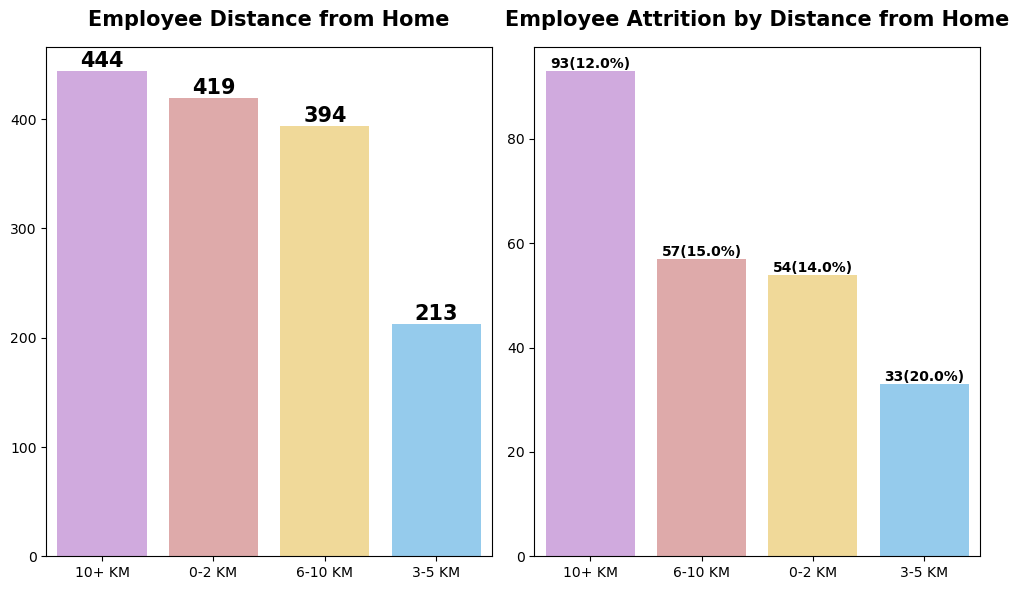

In [33]:
# Visualize to show Total Employees by Distance from Home

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)

value_1 = df["DistanceGroup"].value_counts()
sns.barplot(x=value_1.index.tolist(), y = value_1.values, palette=["#D4A1E7", "#E7A1A1","#FEE08B", "#87CEFA"])
plt.title("Employee Distance from Home", fontweight='black', pad=15, size=15)
for index, value in enumerate(value_1.values):
    plt.text(index, value, value, ha="center", va="bottom", fontweight="black", size=15)
    
    
# Visualize Employees Attrition by Distance from Home

plt.subplot(1,2,2)
new_df = df[df["Attrition"]=='Yes']
value_2 = new_df["DistanceGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#D4A1E7", "#E7A1A1","#FEE08B", "#87CEFA"])
plt.title("Employee Attrition by Distance from Home", fontweight='black', pad=15, size=15)
for index, value in enumerate(value_2.values):
    plt.text(index, value, str(value)+"("+str(attrition_rate[index])+"%)", ha="center", 
             va="bottom", fontweight="black", size=10)
    
plt.tight_layout()
plt.show()

# Analyzing Employee Attrition by Education

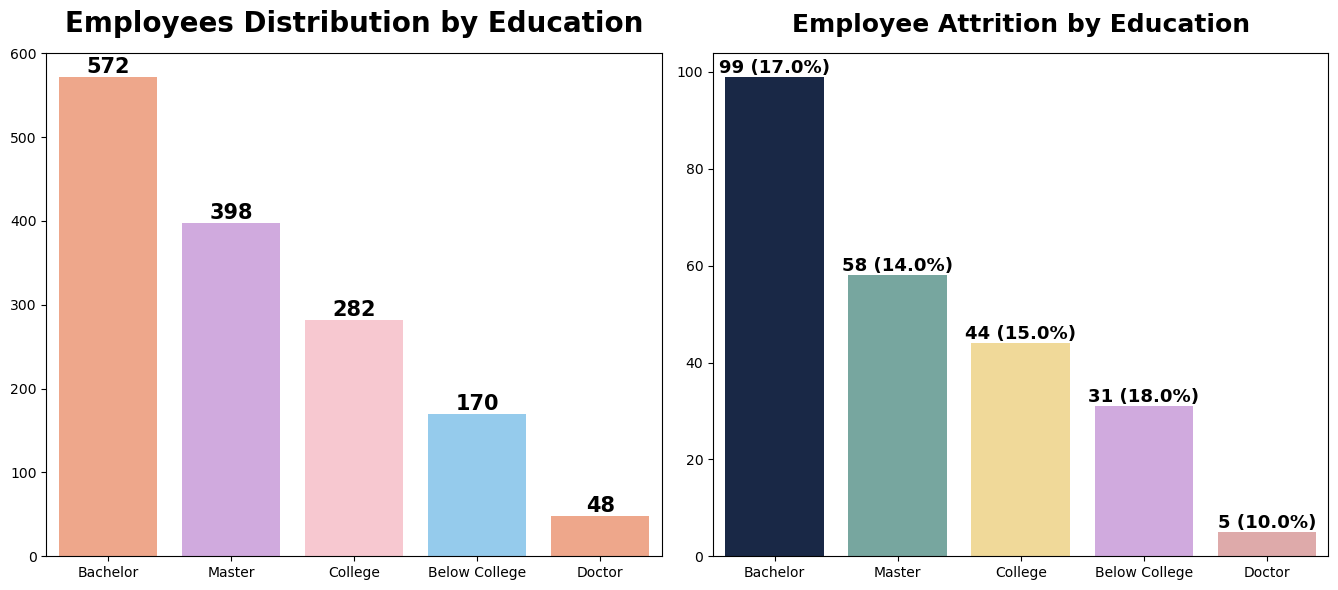

In [34]:
#Visualization to show Total Employees by Education.
plt.figure(figsize=(13.5,6))
plt.subplot(1,2,1)
value_1 = df["Education"].value_counts()
sns.barplot(x=value_1.index,y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees Distribution by Education",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
    
#Visualization to show Employee Attrition by Education.
plt.subplot(1,2,2)
value_2 = new_df["Education"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition by Education",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=13)
plt.tight_layout()
plt.show()

# Analyzing Employee Attrition by Education Field

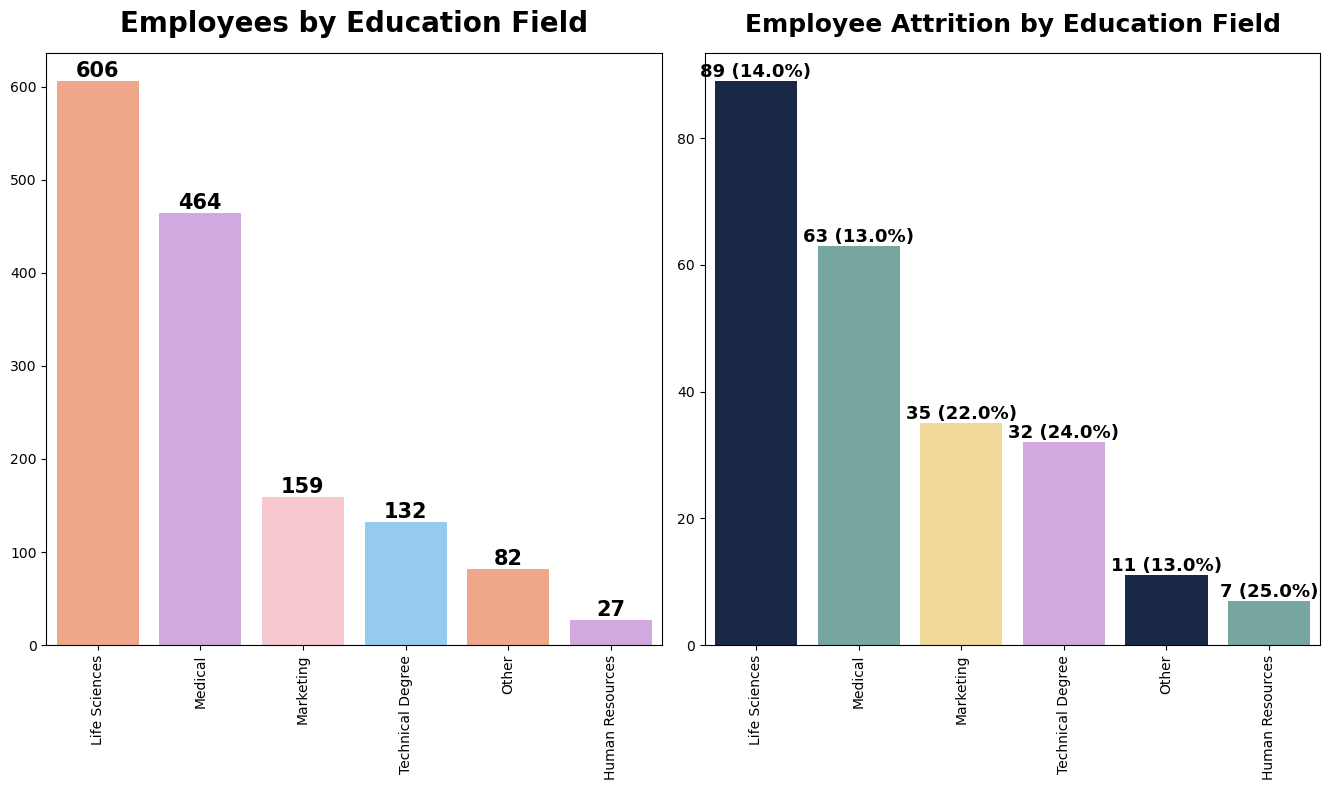

In [35]:
#Visualization to show Total Employees by Education Field.
plt.figure(figsize=(13.5,8))
plt.subplot(1,2,1)
value_1 = df["EducationField"].value_counts()
sns.barplot(x=value_1.index, y=value_1.values,order=value_1.index,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Education Field",fontweight="black",size=20,pad=15)
for index,value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
plt.xticks(rotation=90)

#Visualization to show Employee Attrition by Education Field.
plt.subplot(1,2,2)
value_2 = new_df["EducationField"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7"])
plt.title("Employee Attrition by Education Field",fontweight="black",size=18,pad=15)
for index,value in enumerate(value_2.values):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=13)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Analyzing Employee Attrition by Environment Satisfaction

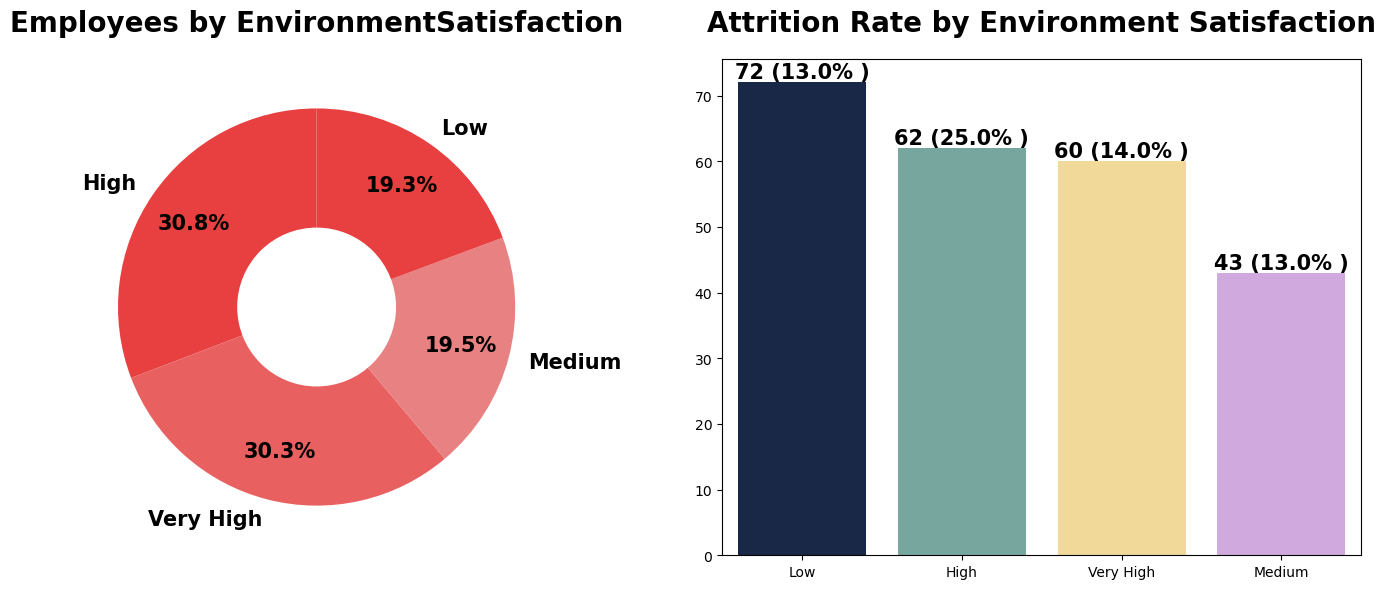

In [36]:
#Visualization to show Total Employees by EnvironmentSatisfaction.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["EnvironmentSatisfaction"].value_counts()
plt.title("Employees by EnvironmentSatisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by EnvironmentSatisfaction.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["EnvironmentSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Environment Satisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

# Analyzing Employee Attrition by Job Roles

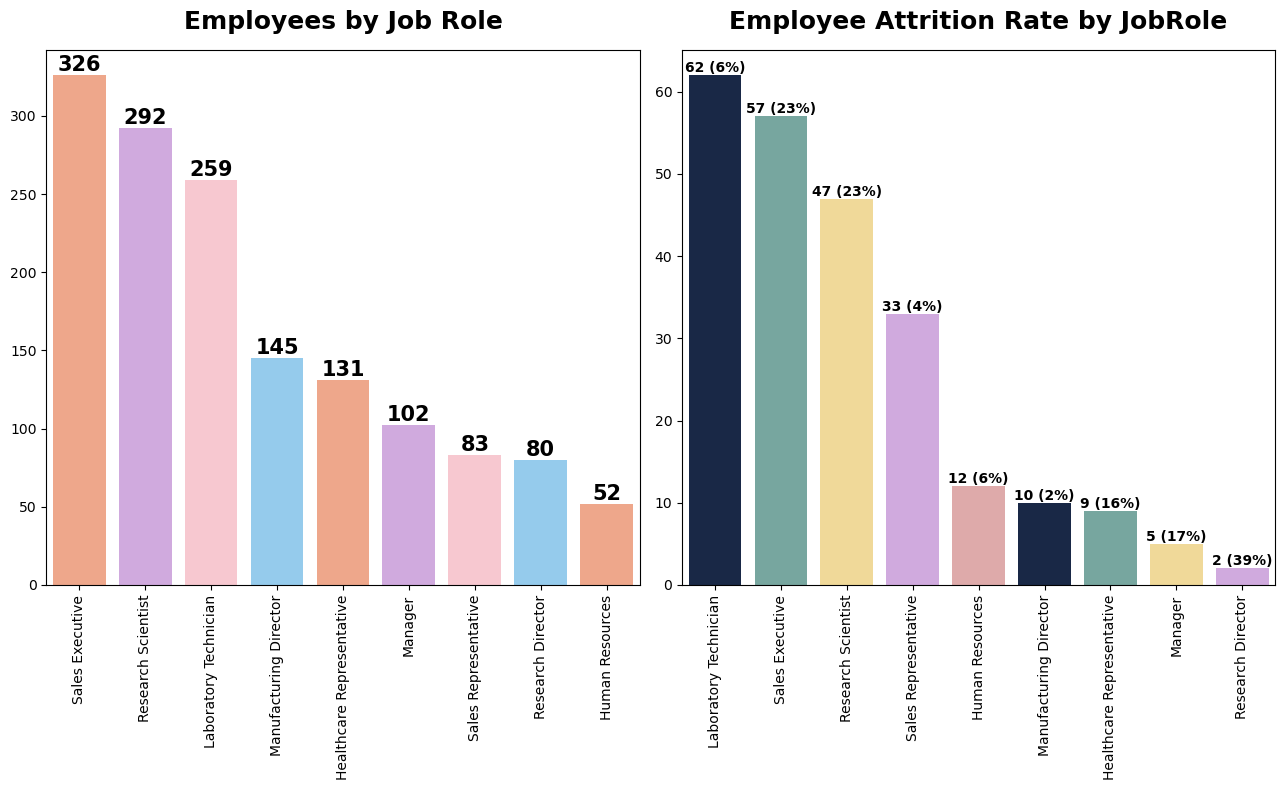

In [37]:
##Visualization to show Total Employees by JobRole.
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
value_1 = df["JobRole"].value_counts()
sns.barplot(x=value_1.index.tolist(), y=value_1.values,palette = ["#FFA07A", "#D4A1E7", "#FFC0CB","#87CEFA"])
plt.title("Employees by Job Role",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index, value in enumerate(value_1.values):
    plt.text(index,value,value,ha="center",va="bottom",fontweight="black",size=15)
    
#Visualization to show Attrition Rate by JobRole.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobRole"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by JobRole",fontweight="black",pad=15,size=18)
plt.xticks(rotation=90)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             fontweight="black",size=10)

plt.tight_layout()
plt.show()

# Analyzing Employee Attrition by Job Level

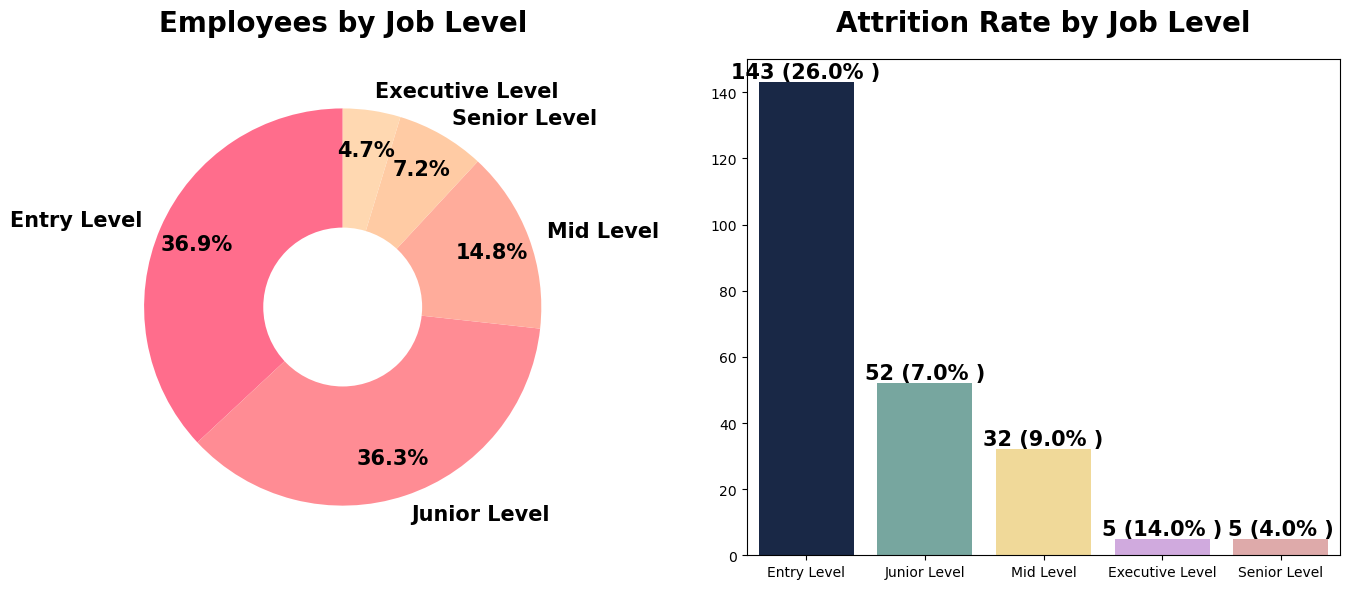

In [38]:
#Visualization to show Total Employees by Job Level.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["JobLevel"].value_counts()
plt.title("Employees by Job Level", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.8,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4',"#FFD8B1"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by JobLevel.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobLevel"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Job Level",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

# Analyzing Employee Attrition by Job Satisfaction

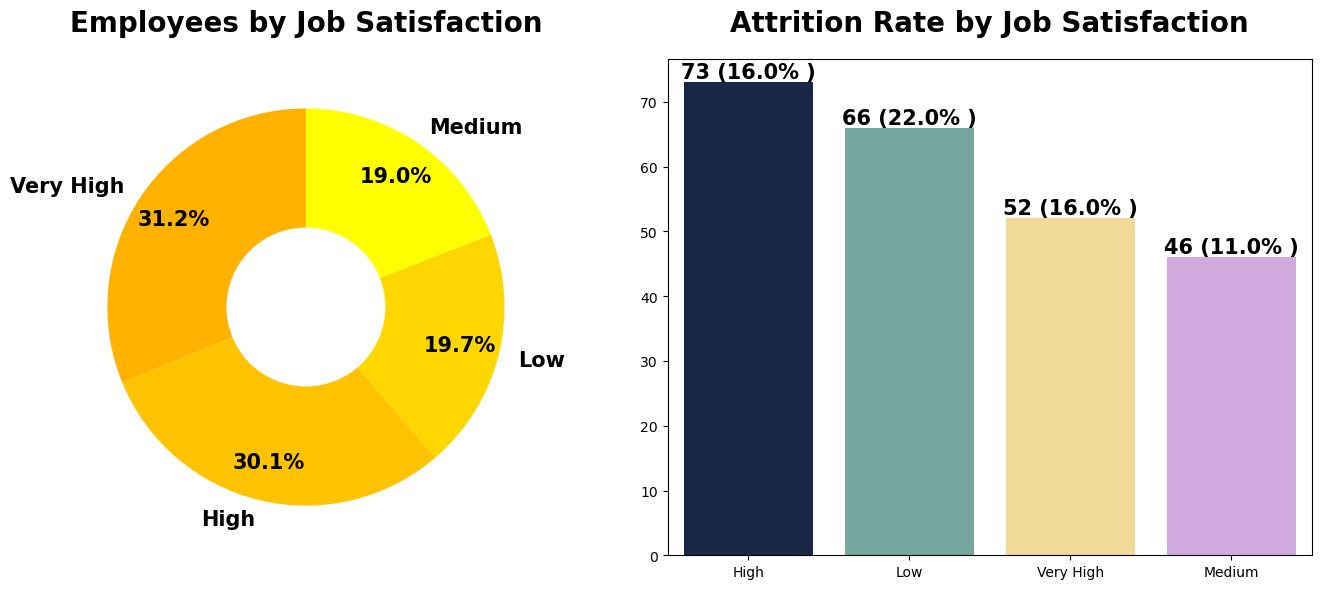

In [39]:
#Visualization to show Total Employees by Job Satisfaction.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["JobSatisfaction"].value_counts()
plt.title("Employees by Job Satisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.8,startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by Job Satisfaction.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["JobSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index,y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Job Satisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(attrition_rate[index])+"% )",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

# Analyzing Employee Attrition by Monthly Income

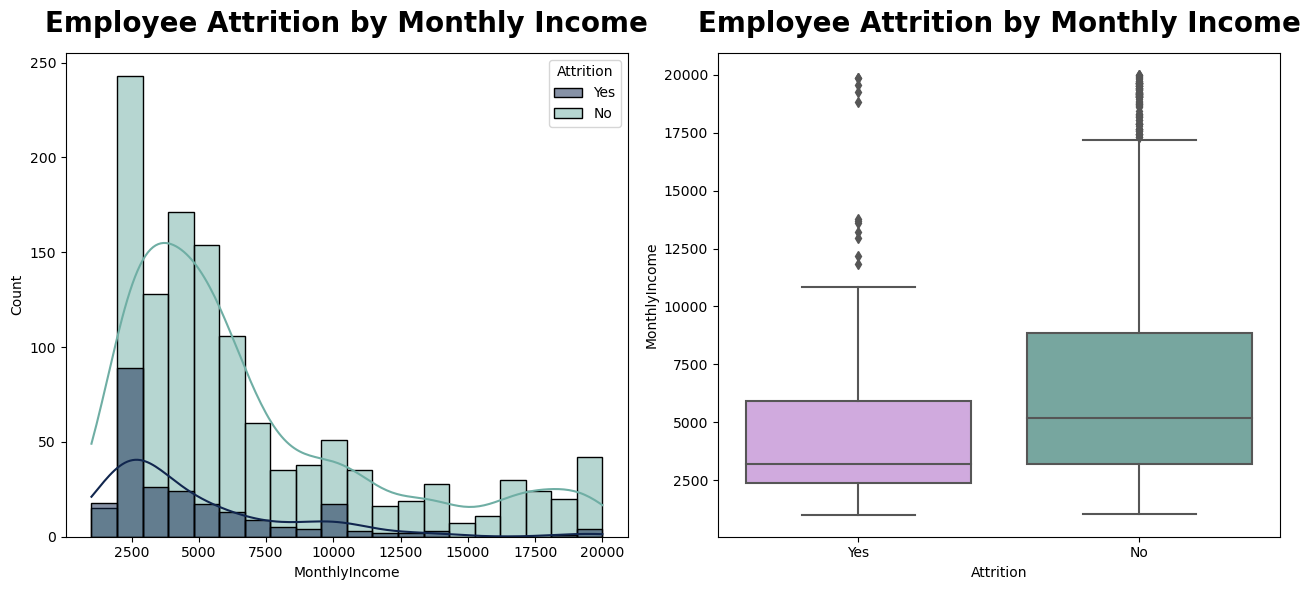

In [40]:
#Visualization to show Employee Distribution by MonthlyIncome.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(x="MonthlyIncome", hue="Attrition", kde=True ,data=df,palette=["#11264e","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=20,pad=15)

#Visualization to show Employee Attrition by Monthly Income.
plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="MonthlyIncome",data=df,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Attrition by Monthly Income",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

# Analyzing Employee Attrition by Monthly Rate

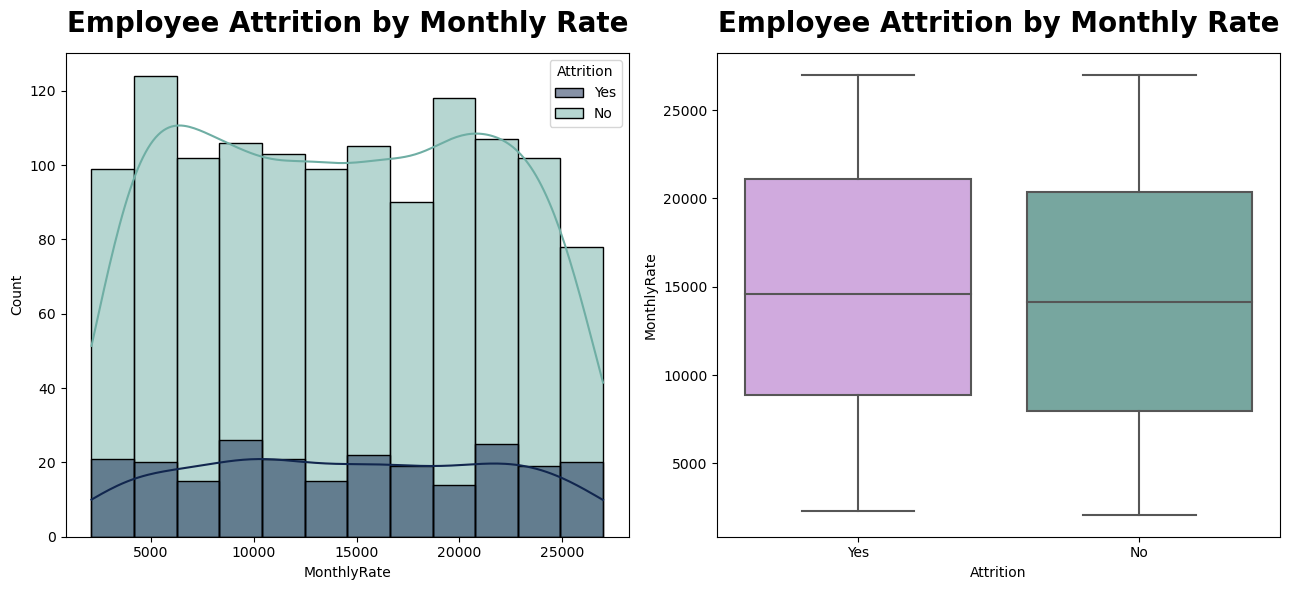

In [41]:
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(x="MonthlyRate", hue="Attrition", data=df,kde=True, palette=["#11264e","#6faea4"])
plt.title("Employee Attrition by Monthly Rate",fontweight="black",size=20,pad=15)

plt.subplot(1,2,2)
sns.boxplot(x="Attrition",y="MonthlyRate",data=df,palette=["#D4A1E7","#6faea4"])
plt.title("Employee Attrition by Monthly Rate",fontweight="black",size=20,pad=15)
plt.tight_layout()
plt.show()

# Analyzing Employee Attrition by Number of Companies Worked

In [42]:
df["NumCompaniesWorked"].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.0,2.0,4.0,9.0


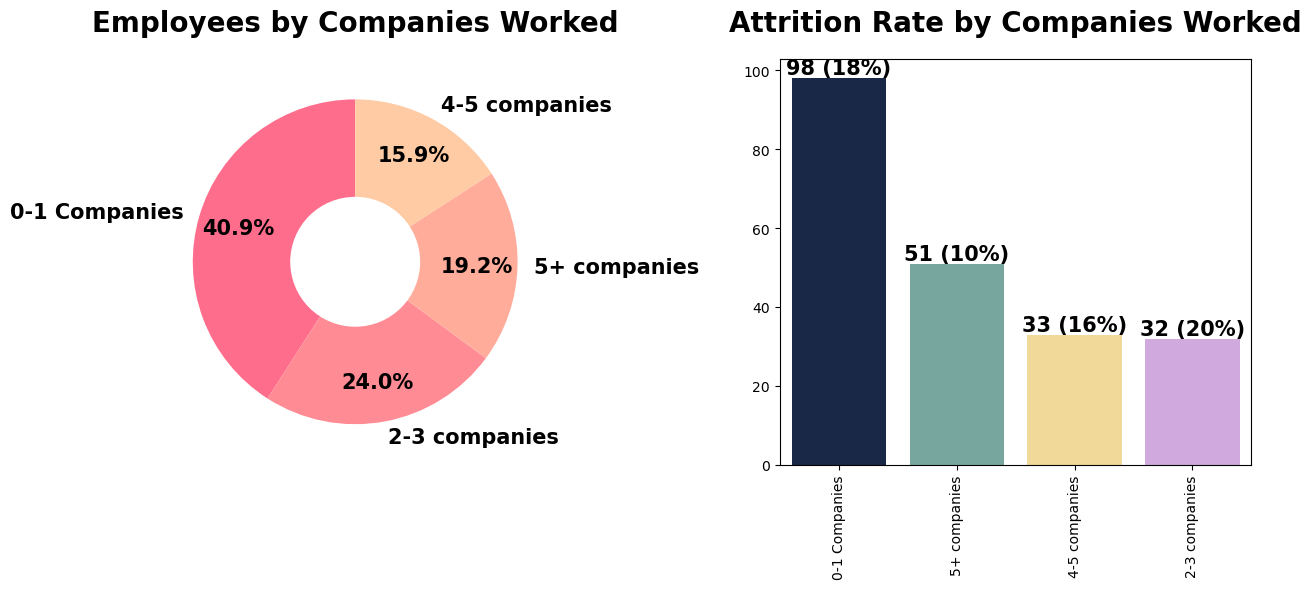

In [43]:
# Define the bin edges for the groups
bin_edges = [0, 1, 3, 5, 10]

# Define the labels for the groups
bin_labels = ['0-1 Companies', '2-3 companies', '4-5 companies', "5+ companies"]

# Cut the DailyRate column into groups
df["NumCompaniesWorkedGroup"] = pd.cut(df['NumCompaniesWorked'], bins=bin_edges, labels=bin_labels)
#Visualization to show Total Employees by NumCompaniesWorked.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df["NumCompaniesWorkedGroup"].value_counts()
plt.title("Employees by Companies Worked", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by NumCompaniesWorked.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["NumCompaniesWorkedGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by Companies Worked",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Analyzing Employee Attrition by Over Time

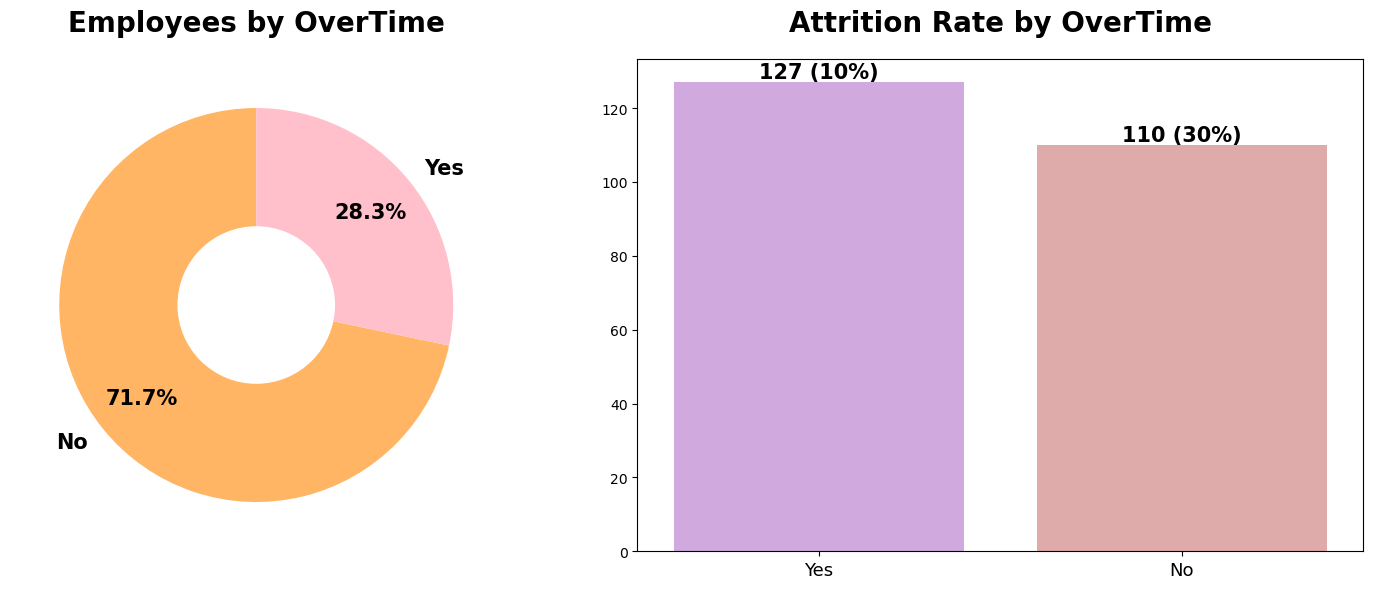

In [44]:
#Visualization to show Total Employees by OverTime.
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
value_1 = df["OverTime"].value_counts()
plt.title("Employees by OverTime", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=["#ffb563","#FFC0CB"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by OverTime.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["OverTime"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by OverTime",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.xticks(size=13)
plt.tight_layout()
plt.show()

# Analyzing Employee Attrition by Percentage Salary Hike

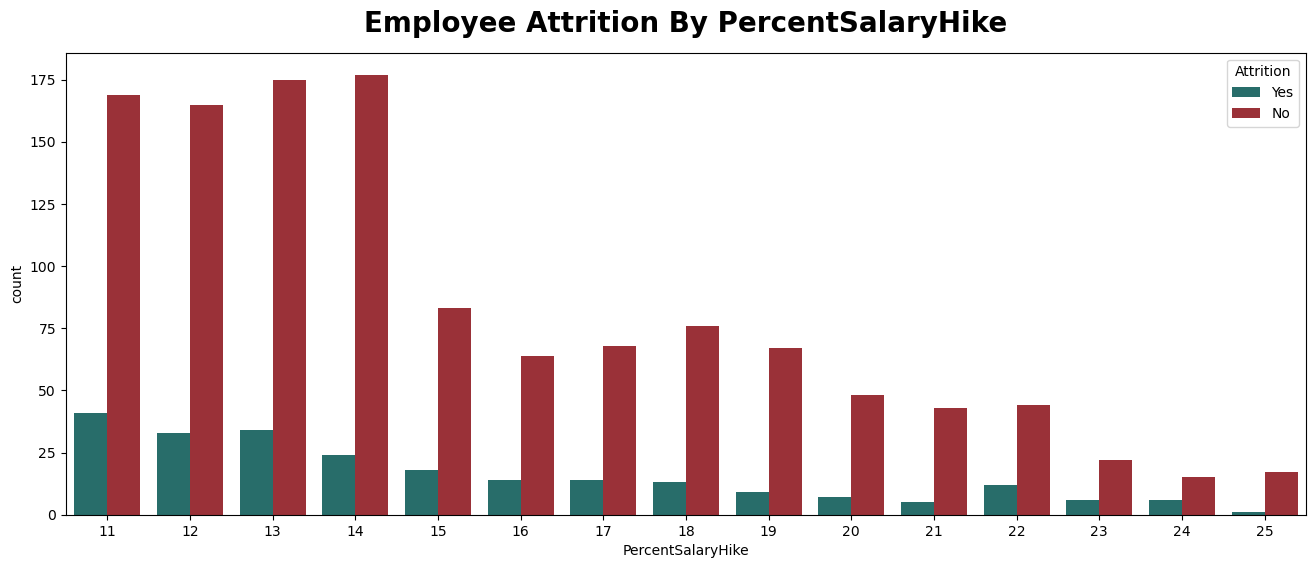

In [45]:
#Visualization to show Employee Distribution by Percentage Salary Hike.
plt.figure(figsize=(16,6))
sns.countplot(x="PercentSalaryHike", hue="Attrition", data=df, palette=["#1d7874","#AC1F29"])
plt.title("Employee Attrition By PercentSalaryHike",fontweight="black",size=20,pad=15)
plt.show()

# Analyzing Employee Attrition by Performance Rating

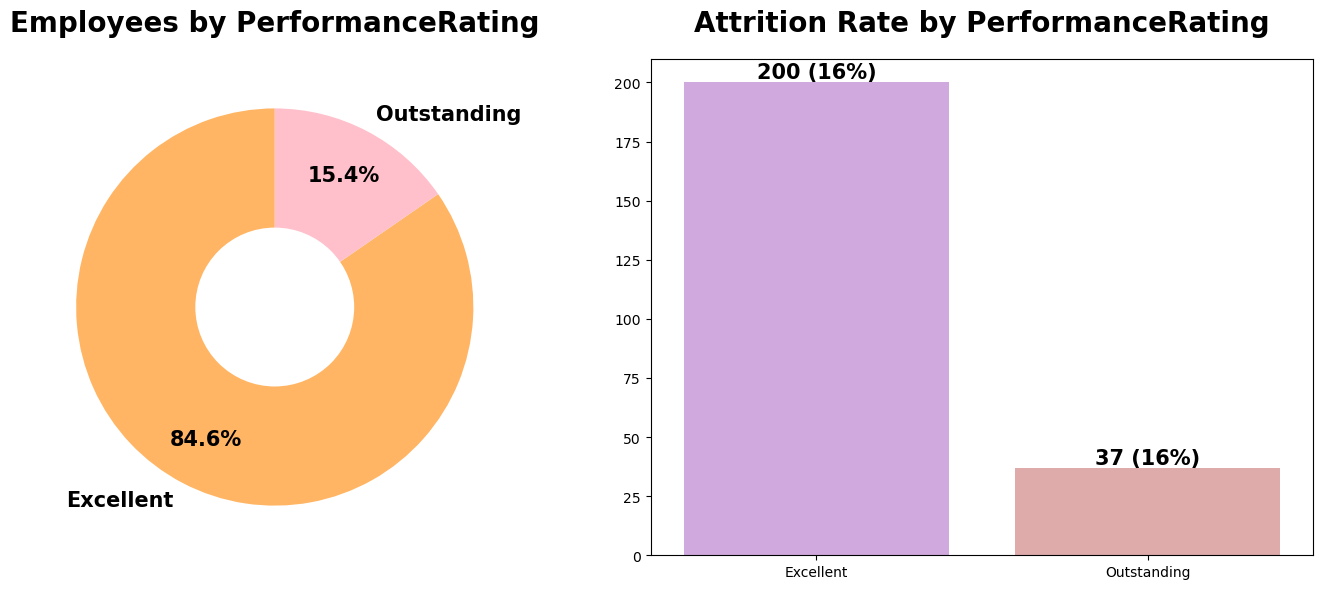

In [46]:
#Visualization to show Total Employees by PerformanceRating.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["PerformanceRating"].value_counts()
plt.title("Employees by PerformanceRating", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=["#ffb563","#FFC0CB"],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by PerformanceRating.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["PerformanceRating"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(),y= value_2.values,palette=["#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by PerformanceRating",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

# Analyzing Employee Attrition by Relationship Satisfaction

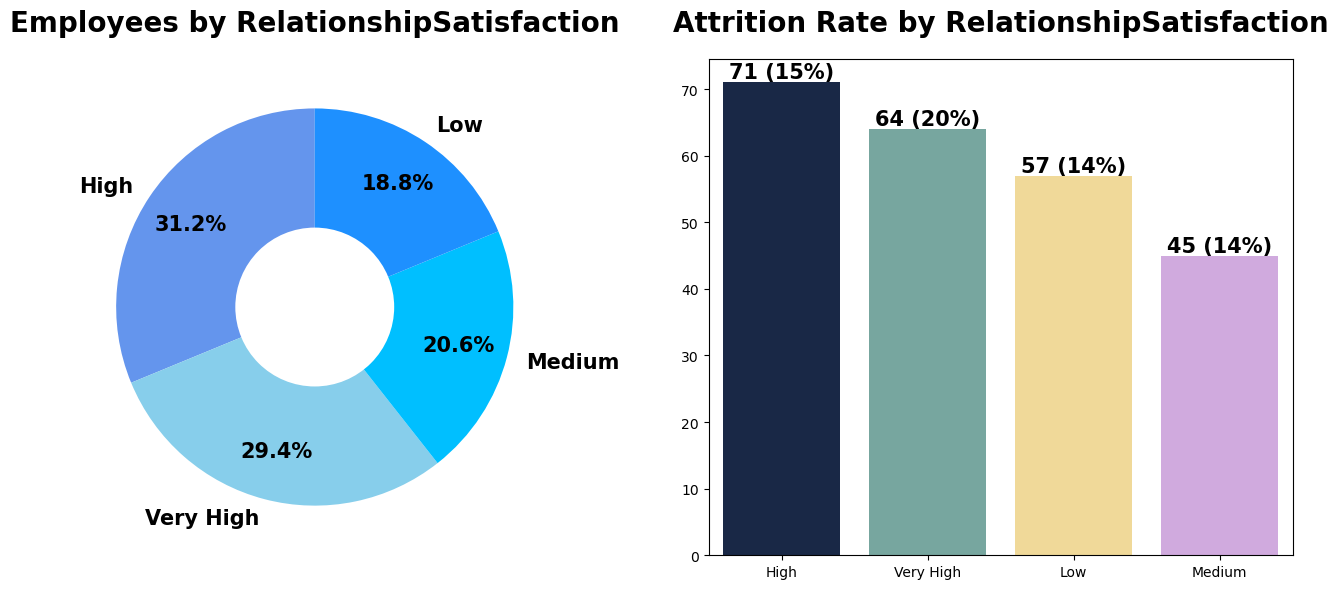

In [47]:
#Visualization to show Total Employees by RelationshipSatisfaction.
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
value_1 = df["RelationshipSatisfaction"].value_counts()
plt.title("Employees by RelationshipSatisfaction", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by RelationshipSatisfaction.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["RelationshipSatisfaction"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by RelationshipSatisfaction",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

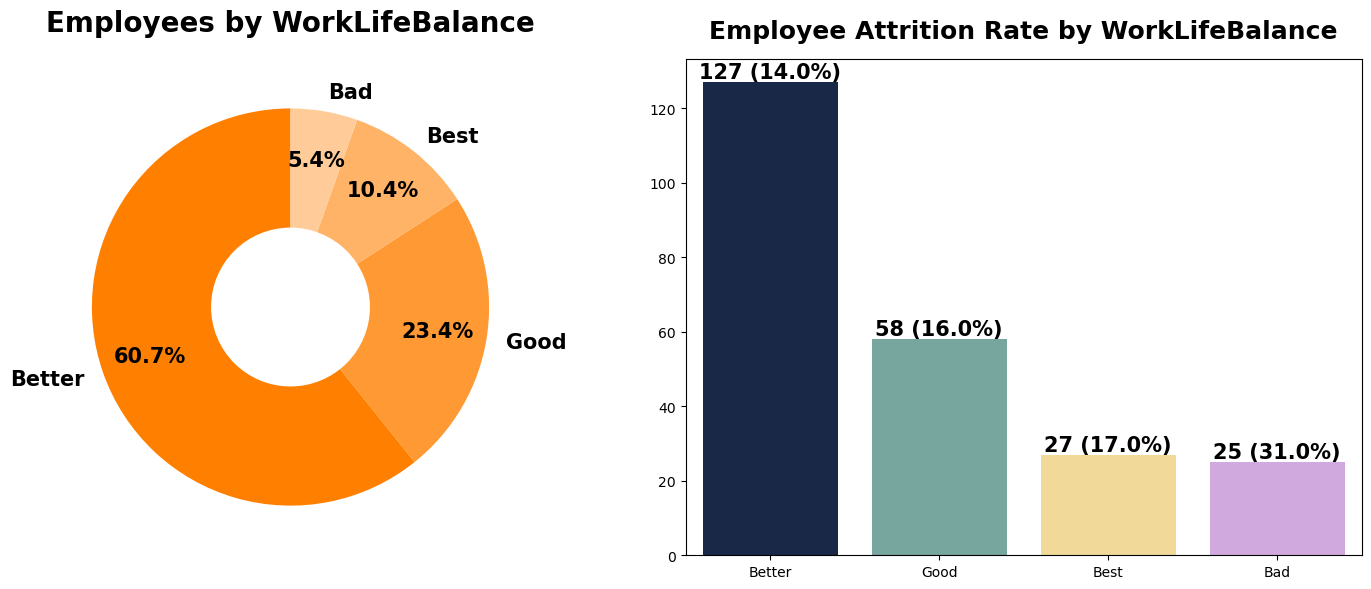

In [48]:
##Visualization to show Total Employees by WorkLifeBalance.
plt.figure(figsize=(14.5,6))
plt.subplot(1,2,1)
value_1 = df["WorkLifeBalance"].value_counts()
plt.title("Employees by WorkLifeBalance", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

#Visualization to show Attrition Rate by WorkLifeBalance.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["WorkLifeBalance"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index, y=value_2.values,order=value_2.index,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Employee Attrition Rate by WorkLifeBalance",fontweight="black",pad=15,size=18)
for index,value in enumerate(value_2.values):
    plt.text(index,value, str(value)+" ("+str(attrition_rate[index])+"%)",ha="center",va="bottom",
             fontweight="black",size=15)
plt.tight_layout()
plt.show()

## Analyzing Employee Attrition by Total Working Years.

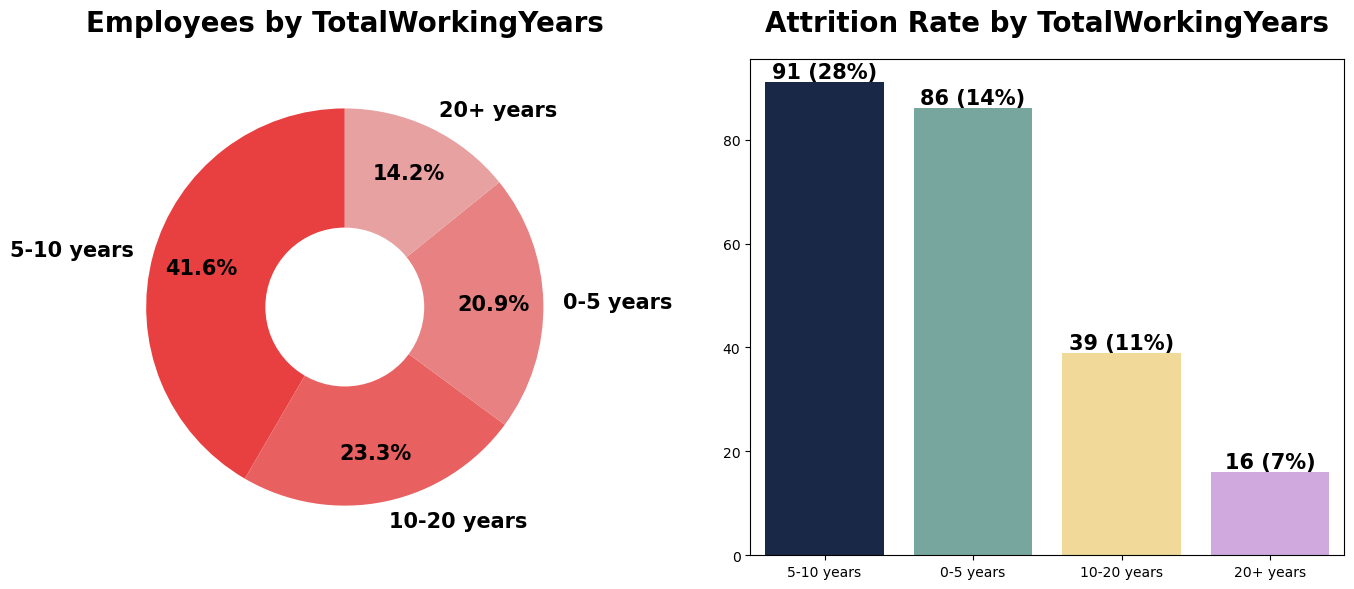

In [49]:
# Define the bin edges for the groups
bin_edges = [0, 5, 10, 20, 50]

# Define the labels for the groups
bin_labels = ['0-5 years', '5-10 years', '10-20 years', "20+ years"]

# Cut the DailyRate column into groups
df["TotalWorkingYearsGroup"] = pd.cut(df['TotalWorkingYears'], bins=bin_edges, labels=bin_labels)
#Visualization to show Total Employees by TotalWorkingYearsGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["TotalWorkingYearsGroup"].value_counts()
plt.title("Employees by TotalWorkingYears", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#E84040', '#E96060', '#E88181', '#E7A1A1'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by TotalWorkingYearsGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["TotalWorkingYearsGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by TotalWorkingYears",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

Inference:
1. Most of the employees are having a total of 5 to 10 years of working experience. But their Attrition Rate is also **very high.
2. Employee with working experience of less than 10 years are having High Attrition Rate.
3. Employee with working experience of more than 10 years are having Less Attrition Rate.


# Analyzing Employee Attrition by Years at Company

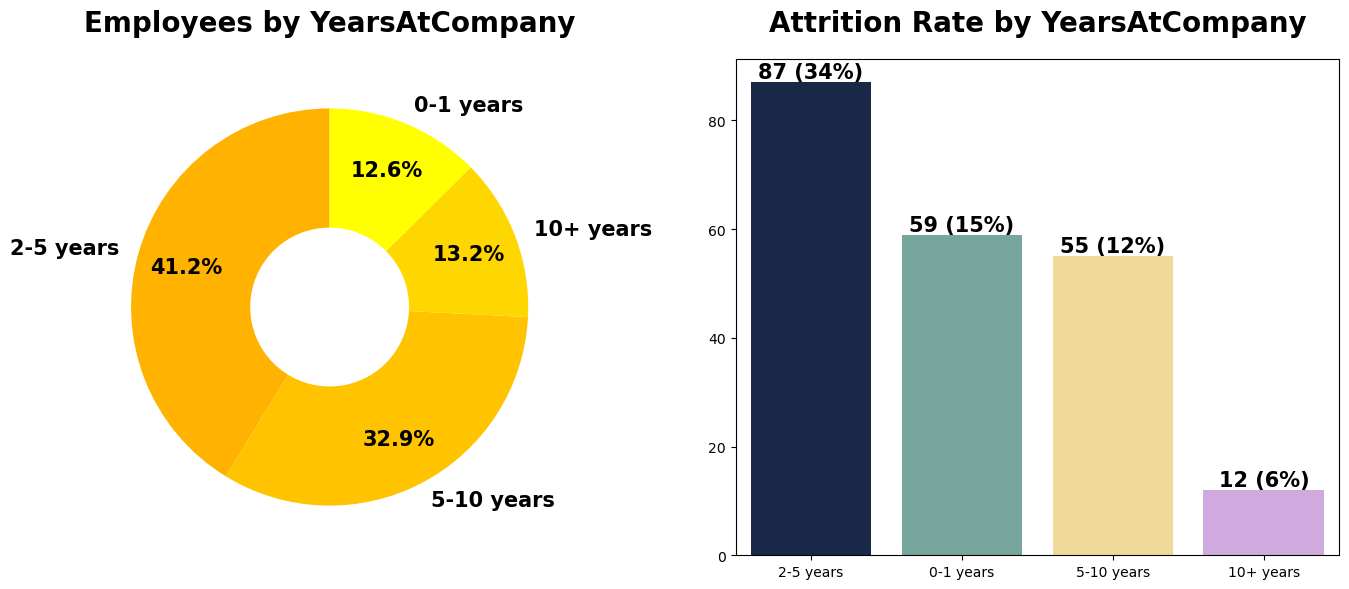

In [51]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsAtCompanyGroup"] = pd.cut(df['YearsAtCompany'], bins=bin_edges, labels=bin_labels)
#Visualization to show Total Employees by YearsAtCompanyGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsAtCompanyGroup"].value_counts()
plt.title("Employees by YearsAtCompany", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FFB300', '#FFC300', '#FFD700', '#FFFF00'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by YearsAtCompanyGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsAtCompanyGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsAtCompany",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

Inference:
1. Most employees has worked for 2 to 10 years in the organization.
2. Very few employees has working for less than 1 year or more than 10 years.
3. Employee who have worked for 2-5 years are having very high attrition rate.
4. Employee who have worked for 10+ years are having low attrition rate.

# Analyzing Employee Attrition by Years In Current Role

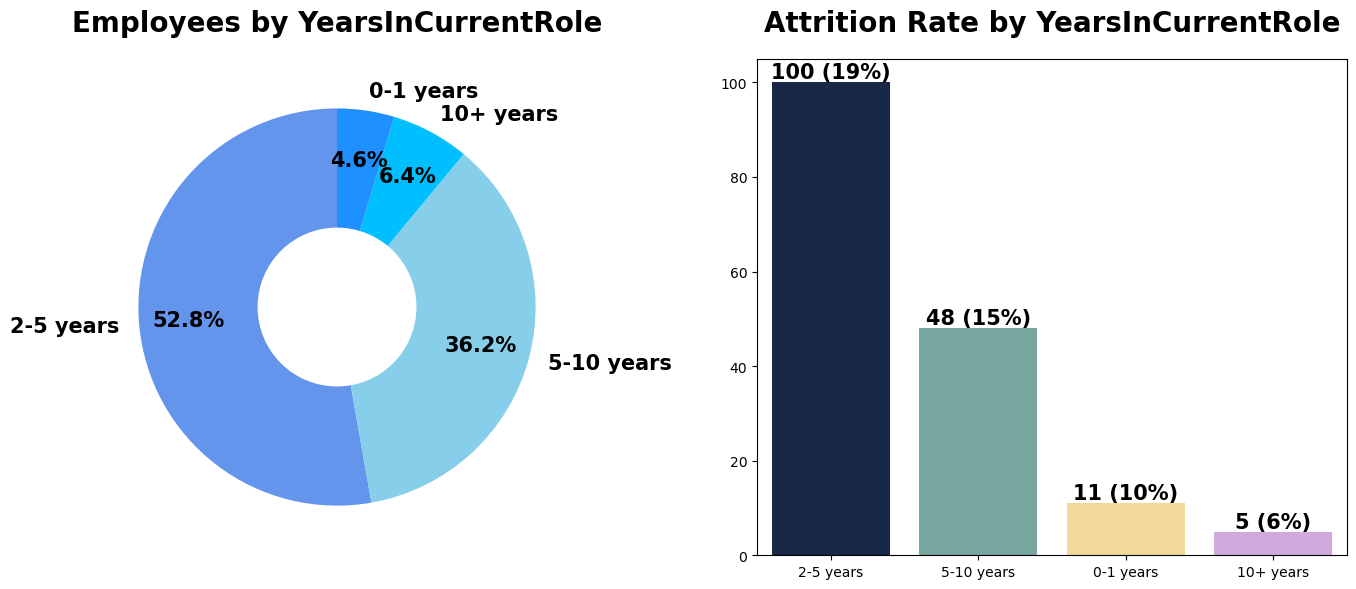

In [52]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsInCurrentRoleGroup"] = pd.cut(df['YearsInCurrentRole'], bins=bin_edges, labels=bin_labels)
#Visualization to show Total Employees by YearsInCurrentRoleGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsInCurrentRoleGroup"].value_counts()
plt.title("Employees by YearsInCurrentRole", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#6495ED', '#87CEEB', '#00BFFF', '#1E90FF'],textprops={"fontweight":"black","size":15,"color":"black"})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by YearsInCurrentRoleGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsInCurrentRoleGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette= ["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsInCurrentRole",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

Inference:
1. Most employees has worked for 2 to 10 years for the same role in the organization.
2. Very few employees has worked for less than 1 year or more than 10 years in the same role.
3. Employee who has worked for 2 to 0 years in the same role are having very high attrition rate.
4. Employee who has worked for 10+ years in the same role are having low attrition rate.

# Analyzing Employee Attrition by Years Since Last Promotion

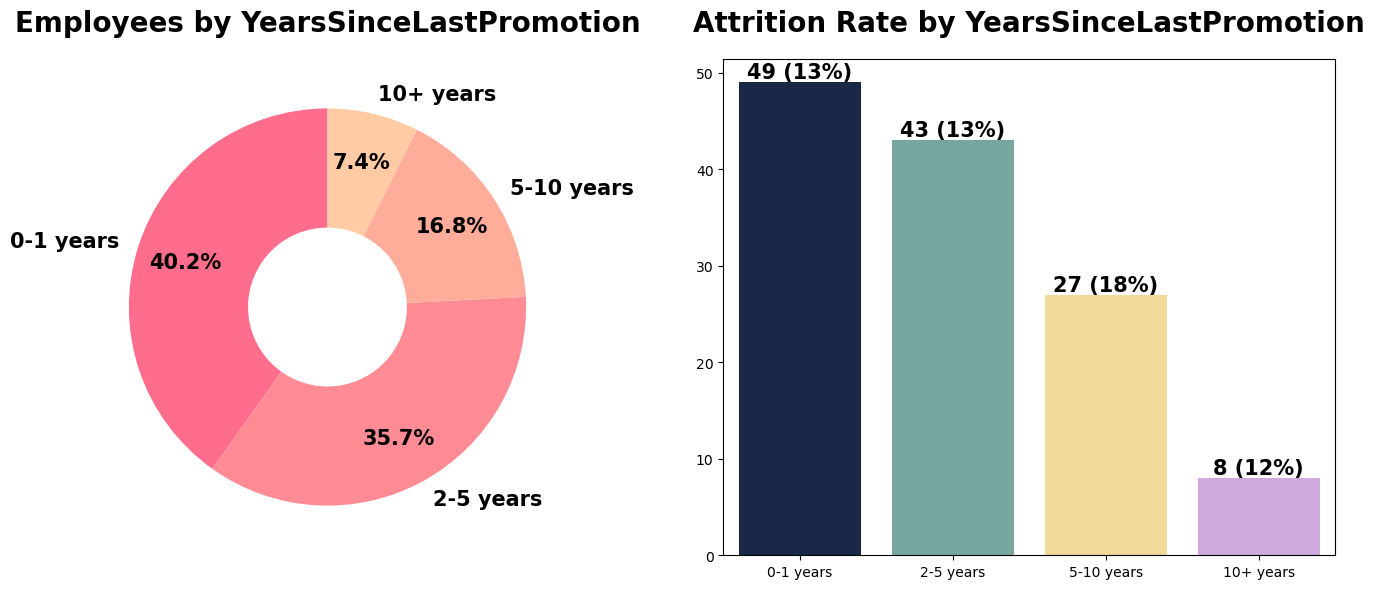

In [53]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsSinceLastPromotionGroup"] = pd.cut(df['YearsSinceLastPromotion'], bins=bin_edges, labels=bin_labels)
#Visualization to show Total Employees by YearsSinceLastPromotionGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsSinceLastPromotionGroup"].value_counts()
plt.title("Employees by YearsSinceLastPromotion", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors=['#FF6D8C', '#FF8C94', '#FFAC9B', '#FFCBA4'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by YearsSinceLastPromotionGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsSinceLastPromotionGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])

plt.title("Attrition Rate by YearsSinceLastPromotion",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

In [ ]:
Inference:
1. Almost 36% of employee has not been promoted since 2 to 5 years.
2. Almost 8% of employees has not been promoted since 10+ years.
3. All the categories in this feature is having high attrition rate specially employee who has not been promoted since 5+ years.

# Analyzing Employee Attrition by Years with Current Manager.

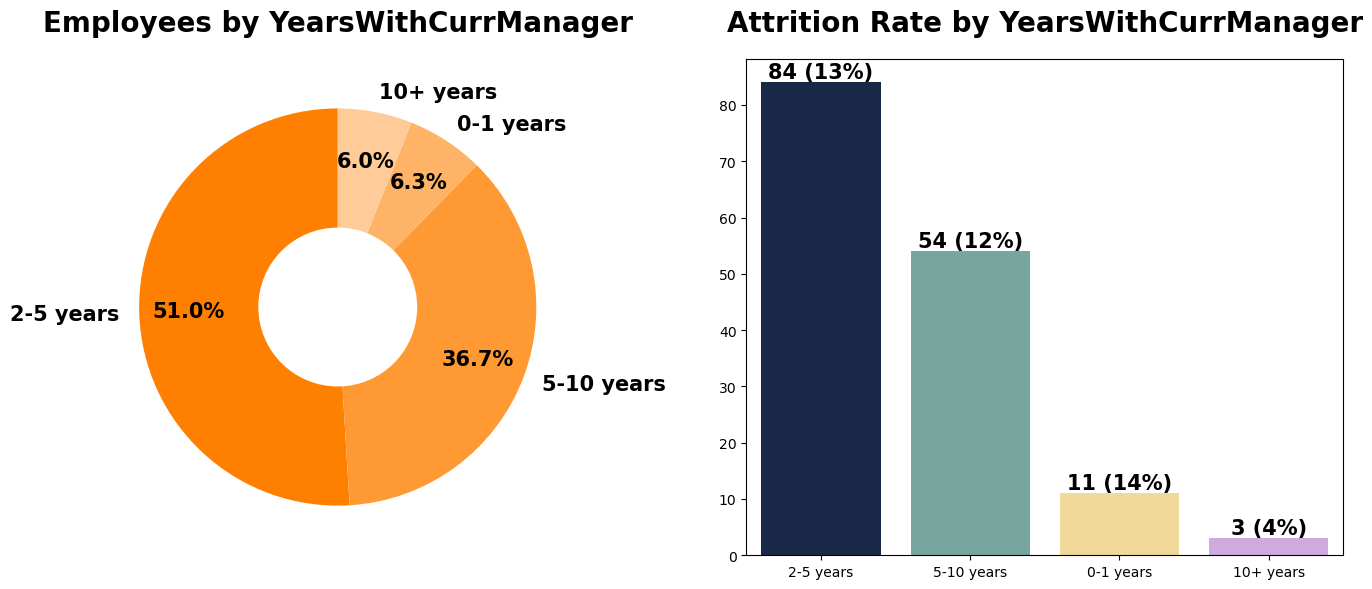

In [54]:
# Define the bin edges for the groups
bin_edges = [0, 1, 5, 10, 20]

# Define the labels for the groups
bin_labels = ['0-1 years', '2-5 years', '5-10 years', "10+ years"]

# Cut the DailyRate column into groups
df["YearsWithCurrManagerGroup"] = pd.cut(df['YearsWithCurrManager'], bins=bin_edges, labels=bin_labels)
#Visualization to show Total Employees by YearsWithCurrManagerGroup.
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
value_1 = df["YearsWithCurrManagerGroup"].value_counts()
plt.title("Employees by YearsWithCurrManager", fontweight="black", size=20, pad=20)
plt.pie(value_1.values, labels=value_1.index, autopct="%.1f%%",pctdistance=0.75,startangle=90,
        colors= ['#FF8000', '#FF9933', '#FFB366', '#FFCC99'],textprops={"fontweight":"black","size":15})
center_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
#Visualization to show Attrition Rate by YearsWithCurrManagerGroup.
plt.subplot(1,2,2)
new_df = df[df["Attrition"]=="Yes"]
value_2 = new_df["YearsWithCurrManagerGroup"].value_counts()
attrition_rate = np.floor((value_2/value_1)*100).values
sns.barplot(x=value_2.index.tolist(), y=value_2.values,palette=["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"])
plt.title("Attrition Rate by YearsWithCurrManager",fontweight="black",size=20,pad=20)
for index,value in enumerate(value_2):
    plt.text(index,value,str(value)+" ("+str(int(attrition_rate[index]))+"%)",ha="center",va="bottom",
             size=15,fontweight="black")
plt.tight_layout()
plt.show()

Inference:
1. Almost 51% of employees has worked for 2-5 years with the same manager.
2. Almost 38% of employees has worked for 5-10 years with the same manager.
3. Employee who has worked for 10+ year with the same manager are having very low attrition rate.
4. Other Categories is having high attrition rate.

# Statistical Analysis - Feature Importance

1. Performing ANOVA Test to Analyze the Numerical Features Importance in Employee Attrition.

Inference:
- Anova test is used to Analyzing the impact of different numerical features on a response categorical feature.
- Anova test returns two statistical values f_score and p_value.
- Note:
1. A larger F-score indicates a stronger association between the independent variable(s) and the dependent variable.
2. If the p-value is below your chosen significance level (e.g., p less than 0.05),than we can reject our null hypothesis.

In [55]:
num_cols = df.select_dtypes(np.number).columns

In [56]:
new_df = df.copy()

new_df['Attrition'] = new_df['Attrition'].replace({"No":0, 'Yes':1})

In [58]:
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [59]:
f_scores={}
p_values={}

for column in num_cols:
    f_score, p_value= stats.f_oneway(new_df[column], new_df["Attrition"])
    
    f_scores[column] = f_score
    p_values[column]= p_value

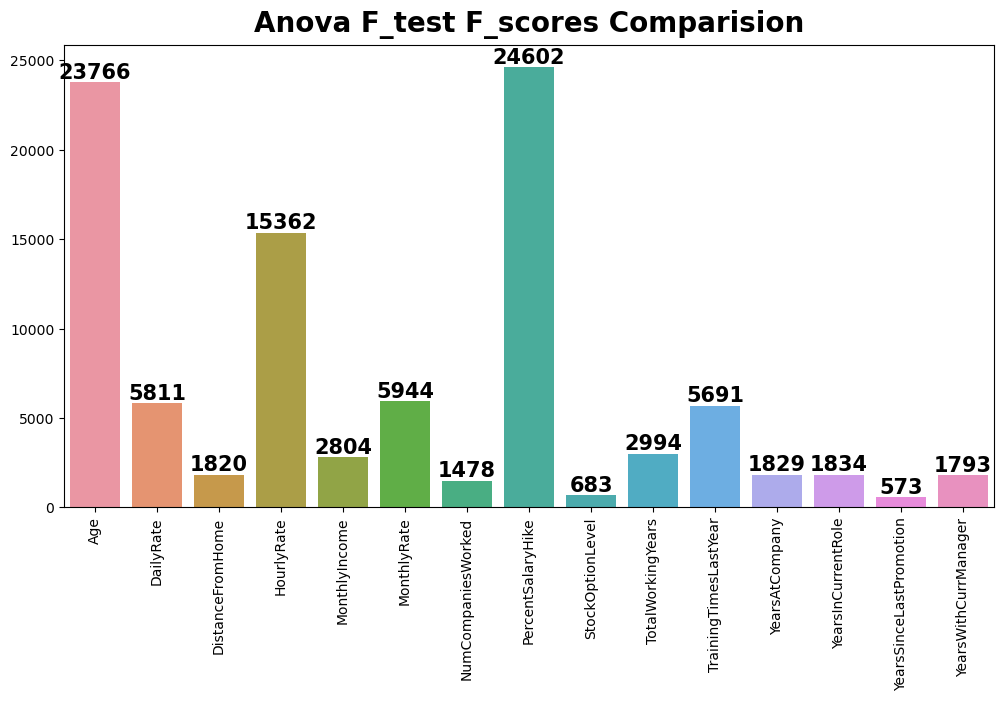

In [60]:
plt.figure(figsize=(12,6))
keys = list(f_scores.keys())
values = list(f_scores.values())

sns.barplot(x=keys, y=values)
plt.title("Anova F_test F_scores Comparision", fontweight='black', size=20, pad=10)
plt.xticks(rotation=90)

for index, value in enumerate(values):
    plt.text(index, value, int(value), ha='center', va='bottom', fontweight='black',size=15)

plt.show()

# Compare F_score and P_value for Anova Test

In [61]:
test_df = pd.DataFrame({'Features':keys, "F_Scores": values})
test_df['P_value'] = [format(p, '.2f') for p in list(p_values.values())]

In [62]:
test_df

,Features,F_Scores,P_value
0,Age,23766.934042,0.00
1,DailyRate,5811.796569,0.00
2,DistanceFromHome,1820.614585,0.00
3,HourlyRate,15362.122371,0.00
4,MonthlyIncome,2804.459632,0.00
5,MonthlyRate,5944.089071,0.00
6,NumCompaniesWorked,1478.188633,0.00
7,PercentSalaryHike,24602.507947,0.00
8,StockOptionLevel,683.069576,0.00
9,TotalWorkingYears,2994.906310,0.00


Inference:
- The following features shows a strong association with attrition, as indicated by their high F-scores and very low p-values.
1. Age
2. DailyRate
3. HourlyRate
4. MonthlyIncome
5. MonthlyRate
6. NumCompaniesWorked
7. PercentSalaryHike
8. TotalWorkingYears
9. TrainingTimesLastYear
10. YearsAtCompany
11. YearsWithCurrManager
- The following features doen't shows significant relationship with attrition because of their moderate 
F-scores and extremely high p-values.
1. DistanceFromHome
2. StockOptionLevel
3. YearsInCurrentRole
4. YearsSinceLastPromotion
- It is important for the organization to pay attention to the identified significant 
features and consider them when implementing strategies to reduce attrition rates.

# Perform Chi square test to analyze categorical Feature Importance in EMployee Attrition

In [63]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols.remove('Attrition')

In [66]:
chi2_stat = {}
p_values={}

for col in cat_cols:
    contingency_table = pd.crosstab(df[col], df["Attrition"])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_stat[col]= chi2
    p_values[col]=p_value

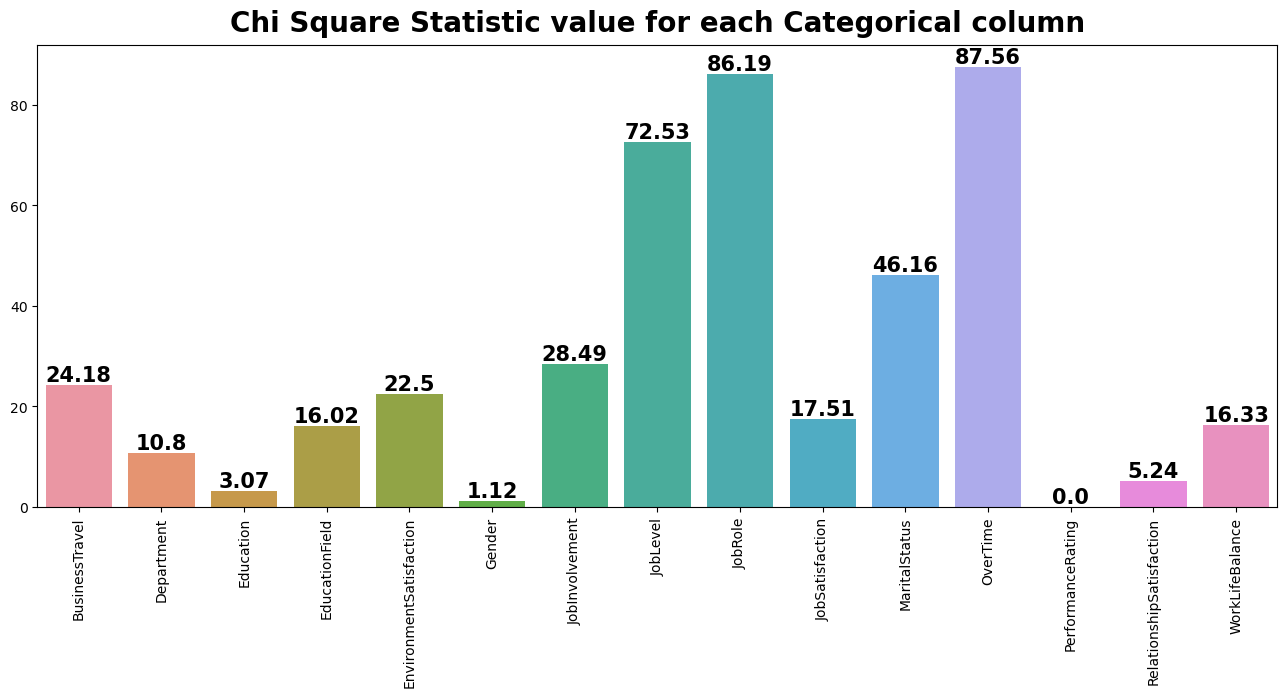

In [67]:
columns = list(chi2_stat.keys())
values = list(chi2_stat.values())

plt.figure(figsize=(16,6))

sns.barplot(x=columns, y=values)
plt.title("Chi Square Statistic value for each Categorical column", fontweight='black', size=20, pad=10)
plt.xticks(rotation=90)

for index, value in enumerate(values):
    plt.text(index, value, round(value,2), ha='center', va='bottom', fontweight='black',size=15)

plt.show()

# Compare Chi_Square and P_value for Chisquare Test

In [70]:
test_df = pd.DataFrame({'Features':columns, "Chi2 Statistics": values})
test_df['P_value'] = [format(p, '.20f') for p in list(p_values.values())]

In [71]:
test_df

,Features,Chi2 Statistics,P_value
0,BusinessTravel,24.182414,0.00000560861447644993
1,Department,10.796007,0.00452560657447963286
2,Education,3.073961,0.54552533765659494414
3,EducationField,16.024674,0.00677398013902521211
4,EnvironmentSatisfaction,22.503881,0.00005123468906289433
5,Gender,1.116967,0.29057244902890855265
6,JobInvolvement,28.492021,0.00000286318063671342
7,JobLevel,72.529013,0.00000000000000663468
8,JobRole,86.190254,0.00000000000000275248
9,JobSatisfaction,17.505077,0.00055630045103875563


Inference:
- The following features showed statistically significant associations with employee attrition:
1. Department
2. EducationField
3. EnvironmentSatisfaction
4. JobInvolvement
5. JobLevel
6. JobRole
7. JobSatisfaction
8. MaritalStatus
9. OverTime
10. WorkLifeBalance
- The following features did not show statistically significant associations with attrition.
1. Gender
2. Education
3. PerformanceRating
4. RelationshipSatisfaction
- It is important for the organization to pay attention to the identified significant features and 
consider them when implementing strategies to reduce attrition rates.

# Conclusion

📊 Key Findings:
1. Several variables showed significant associations with employee attrition, indicating their importance in predicting attrition risk.
2. The numerical variables **include factors related To:
- Age
- Compensation (such as MonthlyIncome and PercentSalaryHike).
- Job experience (such as TotalWorkingYears and YearsAtCompany).
- Specific job-related variables (such as JobRole and YearsInCurrentRole).
3. The categorical variables include factors related to:
- Job-related aspects (such as Department, EducationField, JobRole and MaritalStatus).
- Work-related factors (such as EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, OverTime, and WorkLifeBalance).
📊 Limitations:
1. The analysis is based on the available dataset and may not capture all possible factors influencing employee attrition.
2. There could be other unmeasured variables that play a role in attrition.

# 💡 Recommendations 💡

📊 Recommendations:
- The below recommendations is based on the key findings related to reducing attrition rate.
1. Age:
- Implement strategies to address the specific needs and career aspirations of employees across different age groups. - This can include offering targeted development opportunities, mentorship programs, and flexible work arrangements to support work-life balance.
2. Compensation:
- Regularly review and benchmark compensation packages to ensure they are competitive in the market.
- Consider incorporating performance-based incentives and rewards to motivate employees and recognize their contributions.
3. Job experience:
- Provide opportunities for career advancement, skill development, and cross-functional training.
- Establish clear career paths and provide regular feedback and performance evaluations to support employee growth and engagement.
4. Specific job-related variables: - Tailor retention strategies based on different job roles and responsibilities.
- This can include improving job satisfaction, providing challenging assignments, and fostering a positive work environment. 5. Job-related aspects:
- Enhance employee engagement and job satisfaction by offering a supportive work environment.
- Provide opportunities for professional development, promote a culture of continuous learning, and ensure fair and transparent processes for promotions and career growth.
6. Work-related factors:
- Focus on improving factors such as environment satisfaction, job involvement, job satisfaction, work-life balance, and managing overtime demands.
- Conduct regular employee surveys to understand their concerns and feedback, and take proactive measures to address any identified areas of improvement.
7. Overall:
- Foster a positive organizational culture that values employee well-being, work-life balance, and growth opportunities.
- Encourage open communication, provide avenues for feedback and suggestions, and regularly evaluate and refine retention strategies based on employee feedback and changing needs.
